In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
events = pd.read_csv('./combined_Liverpool.csv')

In [3]:
mask = ((events.Event == 'Pass') & (events.Player == 318871))
passData = events.loc[mask]
passData

,Event,Player,Team,Outcome,X,Y,endX,endY
32,Pass,318871.0,26,Successful,82.1,26.4,96.6,63.7
39,Pass,318871.0,26,Unsuccessful,73.4,7.5,80.5,29.3
92,Pass,318871.0,26,Unsuccessful,37.0,9.8,39.0,10.0
94,Pass,318871.0,26,Successful,57.1,0.0,44.8,43.4
107,Pass,318871.0,26,Unsuccessful,42.4,1.5,71.5,42.5
...,...,...,...,...,...,...,...,...
61411,Pass,318871.0,26,Successful,2.3,0.0,11.3,4.4
61434,Pass,318871.0,26,Unsuccessful,47.9,47.0,84.5,28.5
61470,Pass,318871.0,26,Successful,15.5,49.9,18.8,39.6
61509,Pass,318871.0,26,Unsuccessful,33.5,0.0,43.9,11.0


In [4]:
passData['xM'] = passData.X / 100 * 104
passData['yM'] = passData.Y / 100 * 68
passData['xE'] = passData.endX / 100 * 104
passData['yE'] = passData.endY / 100 * 68

In [5]:
mask = passData['Event'] == 'Pass'
passData = passData[mask]

In [6]:
passData

,Event,Player,Team,Outcome,X,Y,endX,endY,xM,yM,xE,yE
32,Pass,318871.0,26,Successful,82.1,26.4,96.6,63.7,85.384,17.952,100.464,43.316
39,Pass,318871.0,26,Unsuccessful,73.4,7.5,80.5,29.3,76.336,5.100,83.720,19.924
92,Pass,318871.0,26,Unsuccessful,37.0,9.8,39.0,10.0,38.480,6.664,40.560,6.800
94,Pass,318871.0,26,Successful,57.1,0.0,44.8,43.4,59.384,0.000,46.592,29.512
107,Pass,318871.0,26,Unsuccessful,42.4,1.5,71.5,42.5,44.096,1.020,74.360,28.900
...,...,...,...,...,...,...,...,...,...,...,...,...
61411,Pass,318871.0,26,Successful,2.3,0.0,11.3,4.4,2.392,0.000,11.752,2.992
61434,Pass,318871.0,26,Unsuccessful,47.9,47.0,84.5,28.5,49.816,31.960,87.880,19.380
61470,Pass,318871.0,26,Successful,15.5,49.9,18.8,39.6,16.120,33.932,19.552,26.928
61509,Pass,318871.0,26,Unsuccessful,33.5,0.0,43.9,11.0,34.840,0.000,45.656,7.480


In [7]:
passData['dist'] = np.sqrt( (passData.xE-passData.xM)**2 + (passData.yE-passData.yM)**2)

In [8]:
passData

,Event,Player,Team,Outcome,X,Y,endX,endY,xM,yM,xE,yE,dist
32,Pass,318871.0,26,Successful,82.1,26.4,96.6,63.7,85.384,17.952,100.464,43.316,29.508285
39,Pass,318871.0,26,Unsuccessful,73.4,7.5,80.5,29.3,76.336,5.100,83.720,19.924,16.561233
92,Pass,318871.0,26,Unsuccessful,37.0,9.8,39.0,10.0,38.480,6.664,40.560,6.800,2.084441
94,Pass,318871.0,26,Successful,57.1,0.0,44.8,43.4,59.384,0.000,46.592,29.512,32.165096
107,Pass,318871.0,26,Unsuccessful,42.4,1.5,71.5,42.5,44.096,1.020,74.360,28.900,41.148561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61411,Pass,318871.0,26,Successful,2.3,0.0,11.3,4.4,2.392,0.000,11.752,2.992,9.826579
61434,Pass,318871.0,26,Unsuccessful,47.9,47.0,84.5,28.5,49.816,31.960,87.880,19.380,40.088957
61470,Pass,318871.0,26,Successful,15.5,49.9,18.8,39.6,16.120,33.932,19.552,26.928,7.799656
61509,Pass,318871.0,26,Unsuccessful,33.5,0.0,43.9,11.0,34.840,0.000,45.656,7.480,13.150523


In [12]:
mask = (passData['xM'] > 51)
passData[mask]

,Event,Player,Team,Outcome,X,Y,endX,endY,xM,yM,xE,yE,dist
32,Pass,318871.0,26,Successful,82.1,26.4,96.6,63.7,85.384,17.952,100.464,43.316,29.508285
39,Pass,318871.0,26,Unsuccessful,73.4,7.5,80.5,29.3,76.336,5.100,83.720,19.924,16.561233
94,Pass,318871.0,26,Successful,57.1,0.0,44.8,43.4,59.384,0.000,46.592,29.512,32.165096
117,Pass,318871.0,26,Unsuccessful,99.5,0.5,96.4,37.9,103.480,0.340,100.256,25.772,25.635538
155,Pass,318871.0,26,Unsuccessful,66.8,14.6,78.3,6.5,69.472,9.928,81.432,4.420,13.167371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61304,Pass,318871.0,26,Successful,50.7,12.5,83.3,8.3,52.728,8.500,86.632,5.644,34.024079
61348,Pass,318871.0,26,Successful,99.5,0.5,90.9,8.9,103.480,0.340,94.536,6.052,10.612355
61351,Pass,318871.0,26,Unsuccessful,91.3,0.0,96.6,34.0,94.952,0.000,100.464,23.120,23.767973
61357,Pass,318871.0,26,Unsuccessful,99.5,0.5,95.2,40.9,103.480,0.340,99.008,27.812,27.833605


In [11]:
passData.xM.value_counts()

103.480    144
35.984      11
59.176      11
54.808      11
31.824      10
          ... 
11.960       1
81.952       1
14.872       1
89.960       1
6.344        1
Name: xM, Length: 801, dtype: int64

In [112]:
pf = ((passData['xM'] < 50) & (passData['xE'] > 50)) & ((passData['dist'] >= 15) & (passData['dist'] < 30)) & (passData['Outcome'] == 'Successful')
prog15 = passData[pf]
len(prog15)

94

In [113]:
p30 = ((passData['xM'] < 50) & (passData['xE'] < 50)) & (passData['dist'] >= 30) & (passData['Outcome'] == 'Successful') & (passData['xE'] > passData['xM'])
prog30 = passData[p30]
len(prog30)

18

In [114]:
# area = (passData['xM'] < 103) & ((passData['yE'] > 13.84) & (passData['yE'] < 54.16)) & ((passData['xE'] > 87.5)) & (passData['dist'] >= 10) & (passData['Outcome'] == 'Successful')& (passData['xE'] > passData['xM'])
# area_pass = passData[area]
# area_pass

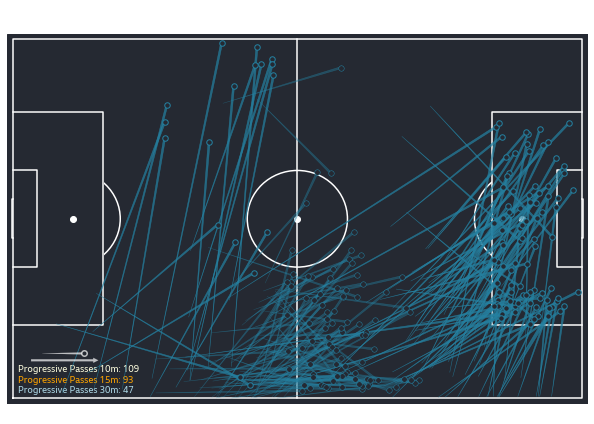

In [119]:
draw_pitch(pitch ='#252932', line ='#ffffff',orientation='horizontal', view='full')


csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

style="wedge,tail_width=0.2"

x30 = prog30.xM.values
y30 = prog30.yM.values
xE30 = prog30.xE.values
yE30 = prog30.yE.values


plt.scatter(xE30,yE30,color="#252932",edgecolors="#2481a1", s=30, linewidth=1, zorder=12)

for i in range(len(prog30)):
    plt.annotate('', xy=(x30[i],y30[i]), xytext=(xE30[i],yE30[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#2481a1', alpha=0.7))


xF = prog15.xM.values
yF = prog15.yM.values
xEF = prog15.xE.values
yEF = prog15.yE.values
    
plt.scatter(xEF,yEF,color="#252932",edgecolors="#2481a1", s=30, linewidth=0.5, zorder=12)


for i in range(len(prog15)):
    plt.annotate('', xy=(xF[i],yF[i]), xytext=(xEF[i],yEF[i]), zorder=6, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#2481a1', alpha=0.4))
    
xA = area_pass.xM.values
yA = area_pass.yM.values
xEA = area_pass.xE.values
yEA = area_pass.yE.values
    
plt.scatter(xEA,yEA,color="#252932",edgecolors="#2481a1", s=30, linewidth=1, zorder=12)


for i in range(len(area_pass)):
    plt.annotate('', xy=(xA[i],yA[i]), xytext=(xEA[i],yEA[i]), zorder=6, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#2481a1', alpha=0.7))

# xT = prog10.xM.values
# yT = prog10.yM.values
# xET = prog10.xE.values
# yET = prog10.yE.values
    
# plt.scatter(xET,yET,color="#252932",edgecolors="#ffa600", s=30, linewidth=0.5, zorder=12)


# for i in range(len(prog10)):
#     plt.annotate('', xy=(xT[i],yT[i]), xytext=(xET[i],yET[i]), zorder=5, arrowprops=dict(arrowstyle=style,
#             linewidth=0.5,  color='#ffa600', alpha=0.3))

plt.annotate('', (5,8.5),(13,8.5), zorder=10, arrowprops=dict(arrowstyle=style,
            linewidth=0.1,  color='#ffffff',alpha=0.7))

plt.scatter(13,8.5,s=30,color="#252932",edgecolors="#ffffff",zorder=20,linewidth=1.5,alpha=0.7)
info_string = "Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest\npoint, or completed passes into the penalty area. Excludes passes from the defending 40% of the pitch"
plt.text(0, -3.5, info_string, color='#ffffff', ha='left', va='bottom', fontsize=6, **csfont, style='italic')

plt.annotate('', (16,7.2),(3,7.2), zorder=10, arrowprops=dict(arrowstyle='simple',
            linewidth=0.1,  color='#ffffff',alpha=0.7))

plt.text(1,5, "Progressive Passes 10m: 109", color='lightyellow',fontsize=9, **csfont)
plt.text(1,3, "Progressive Passes 15m: 93", color='orange',fontsize=9, **csfont)
plt.text(1,1, "Progressive Passes 30m: 47", color='lightblue',fontsize=9, **csfont)


#title
plt.text(0,72, "Trent Alexander-Arnold", color='#ffffff',fontsize=14, fontweight='bold', **csfont)
subtitle_string = 'Progressive Passes | Liverpool | English Premier League | 2019/2020'
plt.text(0, 69.5, subtitle_string, fontsize=9,**csfont, color='#ffffff')
plt.figimage(img, 1549, 1073.5, alpha=.9, zorder=1)

info_string = '@jonollington'
plt.text(93, -3, info_string, color='#ffffff', ha='left', va='bottom', fontsize=9, **csfont)

plt.rcParams['axes.facecolor']='#252932'
plt.rcParams['savefig.facecolor']='#252932'

plt.savefig("TAA_pass 19",bbox_inches="tight",dpi=200);

In [13]:
from PIL import Image

In [14]:
img = Image.open('./Liverpool.png')
img.size

(1042, 1600)

In [15]:
img = img.resize((68, 104), Image.ANTIALIAS)

In [139]:
import matplotlib.patches as patches

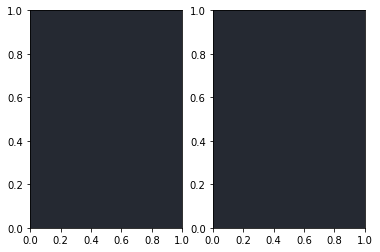

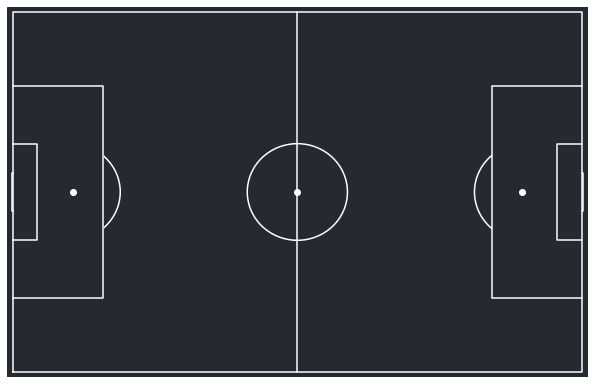

In [144]:
fig, ax = plt.subplots(1,2)
draw_pitch(pitch ='#252932', line ='#ffffff',orientation='horizontal', view='full', ax=ax[1])
# plt_graph("a", "a", "a", ax=ax[0])

In [142]:
def draw_pitch(pitch, line, orientation, view, ax):
     
    orientation = orientation
    view = view
    line = line
    pitch = pitch
     
    if orientation.lower().startswith("h"):
         
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(69,105)
            plt.ylim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
     
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)
 
        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
         
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(69,105)
            plt.xlim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks
 
        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)
 
        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        return